# EXPLORATORY DATA ANALYSIS OF AIR QUALITY INDEX (AQI) OF U.S.A FROM 2001 - 2021

#### DATA SOURCE

The dataset is about the daily Air Quality Index from EPA of States, territories of U.S and regions around the U.S from January 1980 to May 2021 and this is a publicly available daily set which I got from kaggle with the link: https://www.kaggle.com/threnjen/40-years-of-air-quality-index-from-the-epa-daily and the site also referenced the source from: https://aqs.epa.gov/aqsweb/airdata/download_files.html

A sample of the dataset was obtained for my project, the sample includes all information from ** 2001 - 2021. **

The meta-data (variable description) of the dataset is in a separate word file in the **data** folder

**NOTE: Follow the link to the dataset and click on (Download 699MB) at the top right corner before you re-run this jupyter notebook.**

#### LIBARIES USED FOR THE SOURCE CODE OF THIS PROJECT
The **pandas**, **numpy**, and **matplotlib** libraries where used for the source code of this project and they were first imported.

#### DATA LOADING

The **read_csv()** method of the pandas library was used to load the data downloaded from the kaggle link above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("aqi_2001_to_2021.csv")
df.dtypes

State Name             object
Date                   object
AQI                     int64
Category               object
Defining Parameter     object
Latitude              float64
Longitude             float64
County Name            object
dtype: object

In [2]:
df.head()

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2001-01-01,38,Good,PM2.5,30.497478,-87.880258,Baldwin
1,Alabama,2001-01-01,61,Moderate,PM2.5,34.289001,-85.970065,DeKalb
2,Alabama,2001-01-01,35,Good,PM2.5,31.092100,-87.543500,Escambia
3,Alabama,2001-01-01,10,Good,PM10,33.904039,-86.053867,Etowah
4,Alabama,2001-01-01,59,Moderate,PM2.5,33.565278,-86.796389,Jefferson


#### DATA PREPARATION AND CLEANING

The **Date** column above had data type (object) and this was changed to a datetime object to enable easy data-wrangling when rerencing this column, the code below shows how the **Date** column's data type was changed to a datetime data type.

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

State Name                    object
Date                  datetime64[ns]
AQI                            int64
Category                      object
Defining Parameter            object
Latitude                     float64
Longitude                    float64
County Name                   object
dtype: object

The code below shows cleaning done (**sorting**, **droping duplicate records**) on the data and finally seeing the overview of the data after these cleaning processes using **data.info()** code.

In [4]:
data = df.drop_duplicates()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15785 entries, 0 to 15784
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   State Name          15785 non-null  object        
 1   Date                15785 non-null  datetime64[ns]
 2   AQI                 15785 non-null  int64         
 3   Category            15785 non-null  object        
 4   Defining Parameter  15785 non-null  object        
 5   Latitude            15785 non-null  float64       
 6   Longitude           15785 non-null  float64       
 7   County Name         15785 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 986.7+ KB


From the above information of the dataset, we see that there are no missing values, so no imputation was done.

Few rows of the data set was then displayed below to be sure all the cleaning done so far is being reflected correctly by the dataset.

In [5]:
data.head()

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2001-01-01,38,Good,PM2.5,30.497478,-87.880258,Baldwin
1,Alabama,2001-01-01,61,Moderate,PM2.5,34.289001,-85.970065,DeKalb
2,Alabama,2001-01-01,35,Good,PM2.5,31.092100,-87.543500,Escambia
3,Alabama,2001-01-01,10,Good,PM10,33.904039,-86.053867,Etowah
4,Alabama,2001-01-01,59,Moderate,PM2.5,33.565278,-86.796389,Jefferson


Summary descriptive statistics of the numerical columns of the dataset was gotten with the **data.describe()** code and this is shown below.

In [6]:
data.describe()

,AQI,Latitude,Longitude
count,15785.000000,15785.000000,15785.000000
mean,38.450238,38.610802,-93.757585
std,27.159687,5.856807,16.701075
min,0.000000,17.712474,-161.767000
25%,24.000000,35.225136,-106.239900
50%,33.000000,39.278117,-89.622816
75%,48.000000,42.099699,-81.276833
max,895.000000,64.839846,-64.784868


Recall from the few records of the cleaned dataset set displayed above, the **Date** column had values like: **2001-01-01** showing the full date (year, month and day). I then decided to create a new column called **Year** which is would be used later on to get information about any year. The code used for that is shown below:

In [7]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name,Year
0,Alabama,2001-01-01,38,Good,PM2.5,30.497478,-87.880258,Baldwin,2001
1,Alabama,2001-01-01,61,Moderate,PM2.5,34.289001,-85.970065,DeKalb,2001
2,Alabama,2001-01-01,35,Good,PM2.5,31.092100,-87.543500,Escambia,2001
3,Alabama,2001-01-01,10,Good,PM10,33.904039,-86.053867,Etowah,2001
4,Alabama,2001-01-01,59,Moderate,PM2.5,33.565278,-86.796389,Jefferson,2001
...,...,...,...,...,...,...,...,...,...
15780,Wyoming,2021-01-01,44,Good,Ozone,41.364200,-106.239900,Albany,2021
15781,Wyoming,2021-01-01,29,Good,Ozone,44.295496,-105.368761,Campbell,2021
15782,Wyoming,2021-01-01,38,Good,Ozone,42.928800,-109.788000,Sublette,2021
15783,Wyoming,2021-01-01,6,Good,PM10,41.763060,-108.734440,Sweetwater,2021


#### EXPLORATORY DATA ANALYSIS

Before doing the exploratory analysis for this project, some variables where created below using the **groupby()** method with some summary and this information is shown below.

In [8]:
G1 = data['AQI'].groupby([data['State Name'], data['Year']]).mean()
G2 = data['AQI'].groupby(data['Year']).mean()
G3 = data['Category'].groupby([data['State Name'], data['Category']]).count()
G4 = data['Defining Parameter'].groupby([data['State Name'], data['Defining Parameter']]).count()
G5 = data['Defining Parameter'].groupby([data['Defining Parameter'], data['Year']]).count()

**G1** above is a variable used to assigned the groupby() method and the summary of the average **AQI** for each **State Name** and for each **Year**.

The results of G1 and graph of the average AQI of selected states (**Michigan, California, New York, and Texas**) was then plotted below

In [9]:
G1

State Name  Year
Alabama     2001    40.785714
            2002    32.000000
            2003    21.750000
            2004    61.600000
            2005    48.466667
                      ...    
Wyoming     2017    35.529412
            2018    39.600000
            2019    33.000000
            2020    36.352941
            2021    30.400000
Name: AQI, Length: 1122, dtype: float64

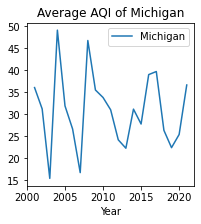

In [10]:
G1.unstack(0)['Michigan'].plot(title="Average AQI of Michigan", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average AQI for Michigan was at it highest in 2004 and at its lowest in 2002.

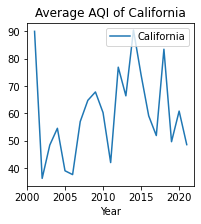

In [11]:
G1.unstack(0)['California'].plot(title="Average AQI of California", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average AQI for California was at it highest in 2001 and 2014, at its lowest in 2002.

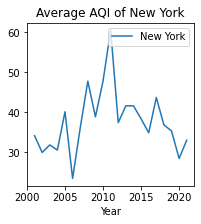

In [12]:
G1.unstack(0)['New York'].plot(title="Average AQI of New York", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average AQI for New York was at it highest in 2011 and at its lowest in 2006.

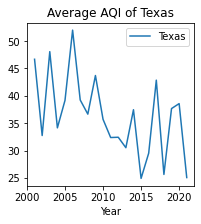

In [13]:
G1.unstack(0)['Texas'].plot(title="Average AQI of Texas", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average AQI for Texas was at it highest in 2006 and at its lowest in 2015 and 2021.

**G2** above is a variable used to assigned the groupby() method and the summary of the average **AQI** for each **Year**.

The results of G2 and graph of the average AQI for each year was then plotted below.

In [14]:
G2

Year
2001    49.424204
2002    34.961062
2003    31.303819
2004    44.256145
2005    40.612658
2006    35.500805
2007    35.334385
2008    41.395683
2009    38.184874
2010    38.108883
2011    42.719424
2012    37.972554
2013    43.096735
2014    44.799726
2015    39.626344
2016    35.774713
2017    37.574324
2018    38.702469
2019    31.154878
2020    31.293989
2021    32.162963
Name: AQI, dtype: float64

<AxesSubplot:title={'center':'Average AQI from 2001 to 2021'}, xlabel='Year'>

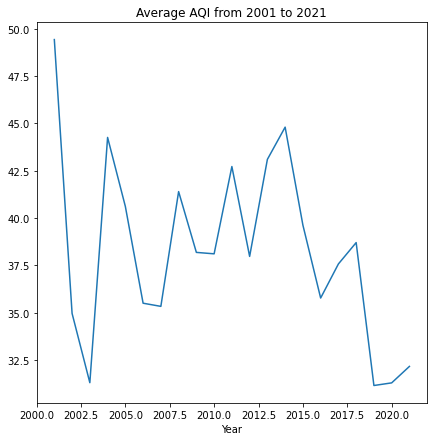

In [15]:
G2.plot.line(title='Average AQI from 2001 to 2021',figsize=(7,7))

**G3** above is a variable used to assigned the groupby() method and the summary of the count (the numer of times) a category defining the level of concern after the AQI rating was made for each **State Name** .

The result of G3 and graph showing all states and the counts is shown below.

**Note:** A **stacked bar graph** was plotted instead of the **side-by-side bar graph** as we have so many values in the y-aXiS (**State Name**) to avoid the plot being messy.

In [16]:
G3

State Name  Category                      
Alabama     Good                              144
            Moderate                           40
            Unhealthy for Sensitive Groups      2
Alaska      Good                               74
            Moderate                           28
                                             ... 
Wisconsin   Unhealthy for Sensitive Groups      2
Wyoming     Good                              253
            Hazardous                           1
            Moderate                           25
            Unhealthy                           1
Name: Category, Length: 172, dtype: int64

<AxesSubplot:title={'center':'States and Frequency of AQI categories from 2001 to 2021'}, ylabel='State Name'>

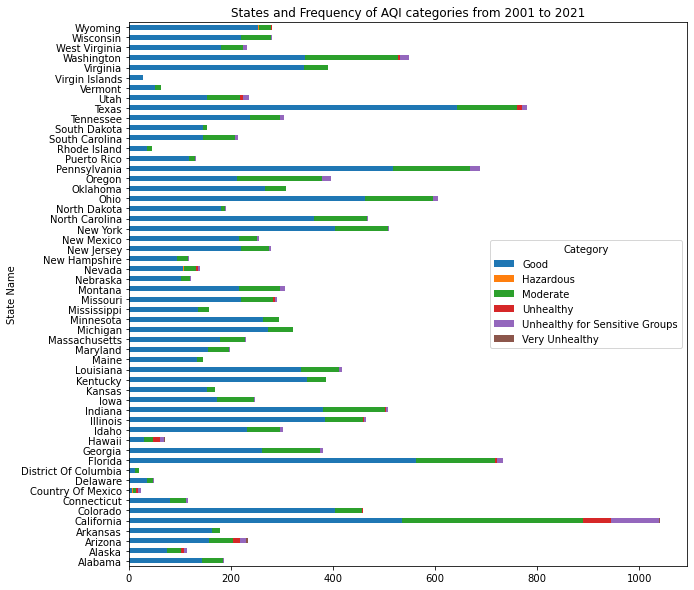

In [17]:
G3.unstack('Category').plot(title='States and Frequency of AQI categories from 2001 to 2021',kind='barh', stacked=True, figsize=(10,10))

From the graph above, we see that **California** had the highest amount of times for which the AQI measured for the state was classified as either **Unhealthy** or **Unhealthy for Sensitive Groups** with **red** and **purple** label respectively compared to any other states.

**G4** above is a variable used to assigned the groupby() method and the summary of the count (the numer of times) a defining parameter (prevailing Air pollutant) was found for each **State Name** .

The result of G4 is shown below.

In [18]:
G4

State Name  Defining Parameter
Alabama     Ozone                  20
            PM10                    7
            PM2.5                 151
            SO2                     8
Alaska      CO                      9
                                 ... 
Wyoming     NO2                     8
            Ozone                 141
            PM10                   71
            PM2.5                  50
            SO2                     9
Name: Defining Parameter, Length: 267, dtype: int64

**G5** above is a variable used to assigned the groupby() method and the summary of the count (the numer of times) a parameter defining (prevailing Air pollutant) was found for each **Year**

The result of G5 and graph andshowing these defining parameter and the counts is shown below.

In [19]:
G5

Defining Parameter  Year
CO                  2001     6
                    2002    24
                    2003    35
                    2004     7
                    2005     8
                            ..
SO2                 2017    44
                    2018    55
                    2019    58
                    2020    60
                    2021    34
Name: Defining Parameter, Length: 123, dtype: int64

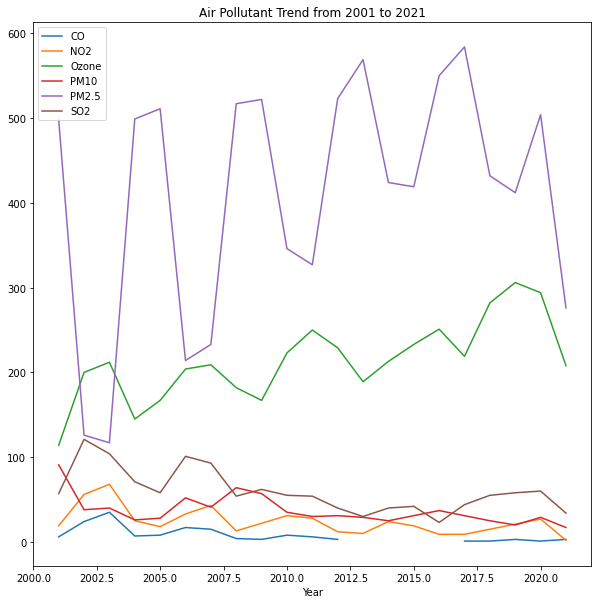

In [20]:
G5.unstack(0).plot(title='Air Pollutant Trend from 2001 to 2021', figsize=(10, 10))
plt.legend(loc='upper left')
plt.show()

From the above we see that all defining parameter (prevailing air pollutant) trend decreases over the years and in particular **PM2.5** (in purple) had the highest count. This actually maskes sense as **PM2.5** is what we actually perceive as dust or wind and has we know contain pollutants which are not visible to the naked eyes.